In [ ]:
!pip install coclust
!pip install scikit-learn==0.22.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from coclust.evaluation.external import accuracy
import matplotlib.cm as cm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for coclust: filename=coclust-0.2.1-py3-none-any.whl size=29870 sha256=a7b1763b5ac1d54cac2b728a0e75f42fb6d59050a8558d1742d2a0a2e5b67ef7
  Stored in directory: /root/.cache/pip/wheels/21/e9/ac/5d162f4eb117a4437f05c48020e114b23940312c67f13a5a8e
Successfully built coclust
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0,

/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:18: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


**Loading Dataset**

In [ ]:
from sklearn import datasets

wine = datasets.load_wine()

In [ ]:
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = pd.Series(wine.target)
df_wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

**Scaling down the data**

In [ ]:
scaler = MinMaxScaler()
for i in range(len(wine.feature_names)):
  scaler.fit(df_wine[[wine.feature_names[i]]])
  df_wine[wine.feature_names[i]] = scaler.transform(df_wine[[wine.feature_names[i]]])

In [ ]:
df_wine.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  target  
0         0.372014  0.455285                      0.970696  0.561341       0  
1         0.264505  0.463415                      0.780220  0.550642       0  
2         0.375427  0.447154                      0.695971  0.646933       0  
3         0.556314  0.308943                      0.798535  0.857347       0  
4         0.259386  0.455285                      0.608059  0.325963       0

In [ ]:
x = df_wine.iloc[:, :13].values
print(x)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


**Finding the optimum number of clusters for k-means classification**

**1) Elbow Method**

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

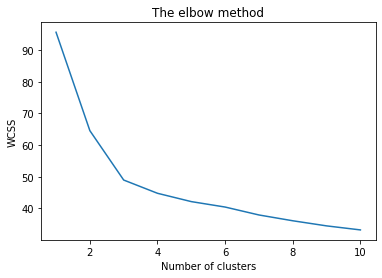

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

**2) Silhouette Score method**

For n_clusters = 2 The average silhouette_score is : 0.2987221815974774
For n_clusters = 3 The average silhouette_score is : 0.3013463273503232
For n_clusters = 4 The average silhouette_score is : 0.24444901569584707
For n_clusters = 5 The average silhouette_score is : 0.21869632088122407
For n_clusters = 6 The average silhouette_score is : 0.20378422969908738
For n_clusters = 7 The average silhouette_score is : 0.16764915794356686
For n_clusters = 8 The average silhouette_score is : 0.12903550426674473
For n_clusters = 9 The average silhouette_score is : 0.14319045608438313
For n_clusters = 10 The average silhouette_score is : 0.1934854855885726


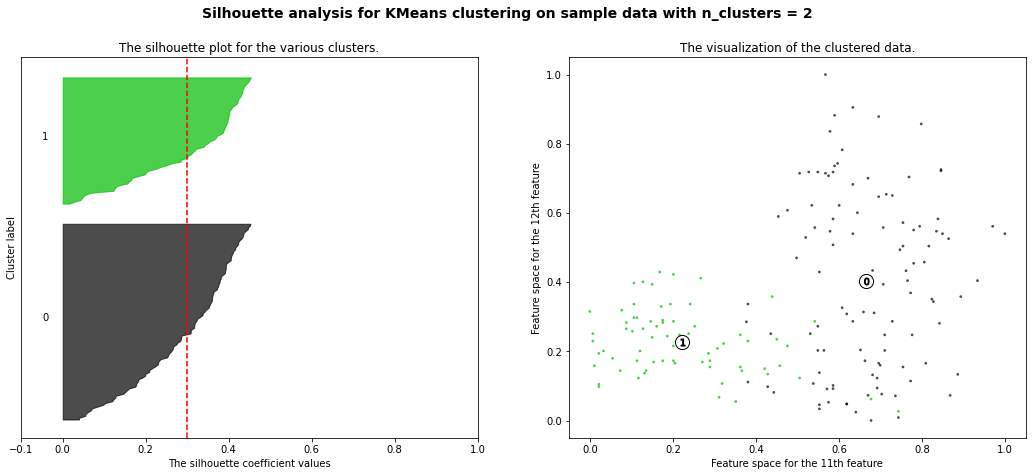

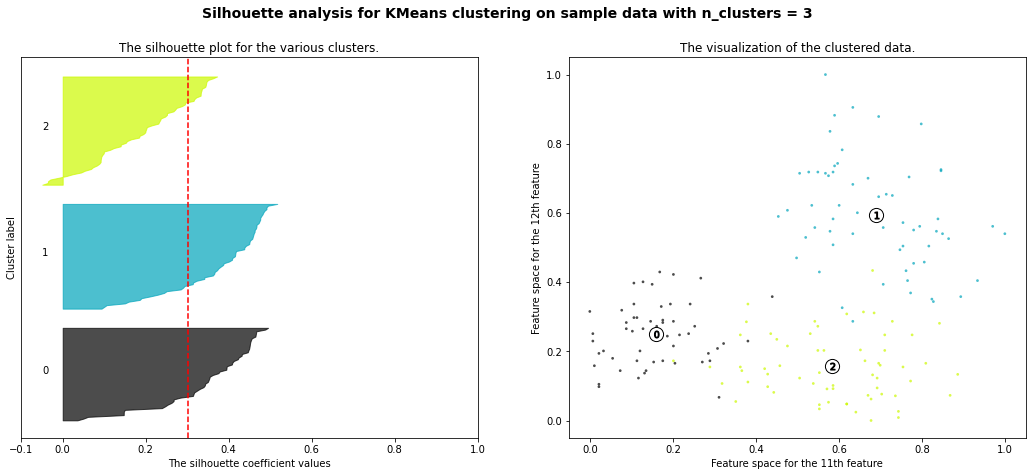

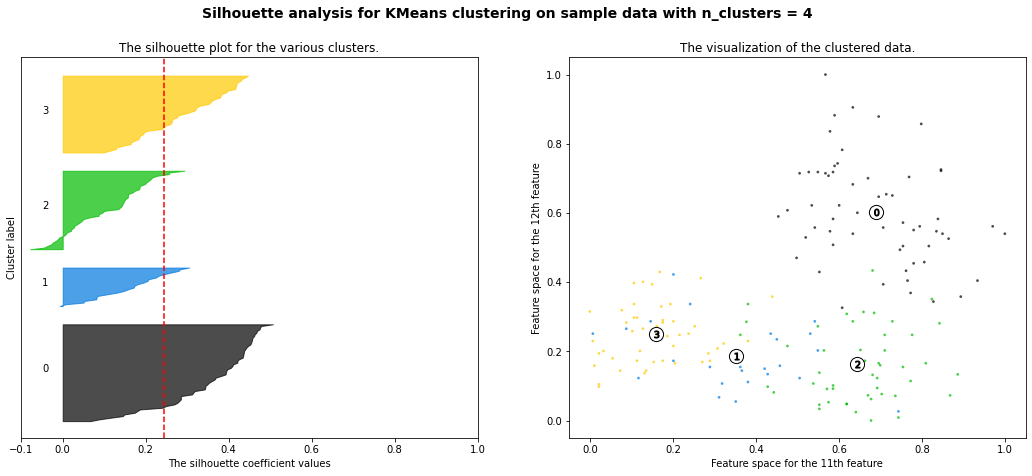

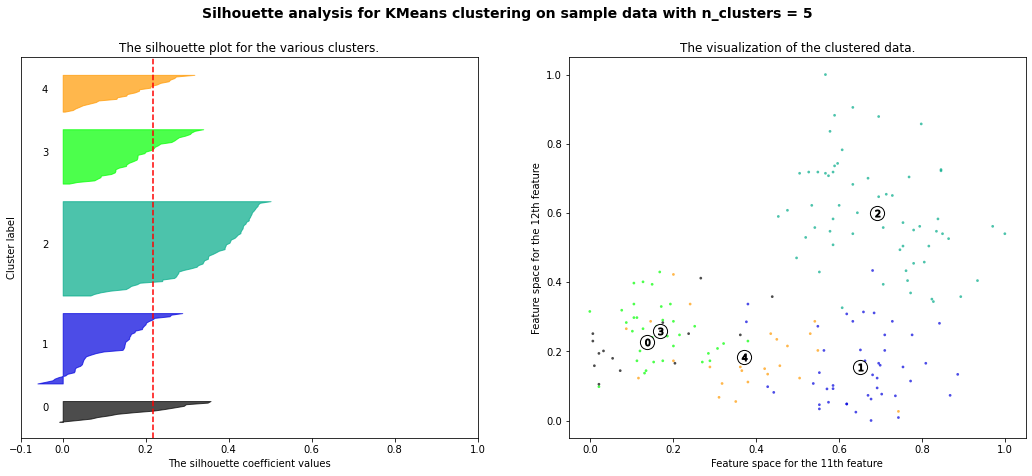

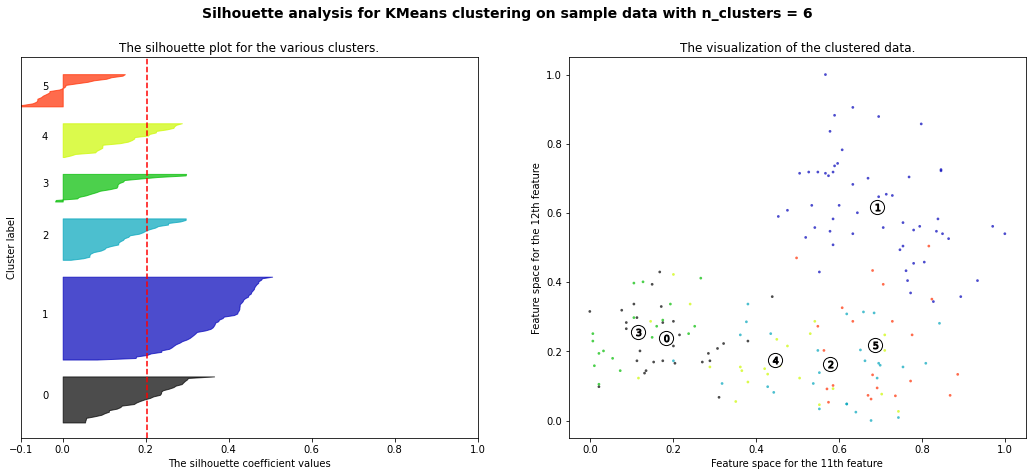

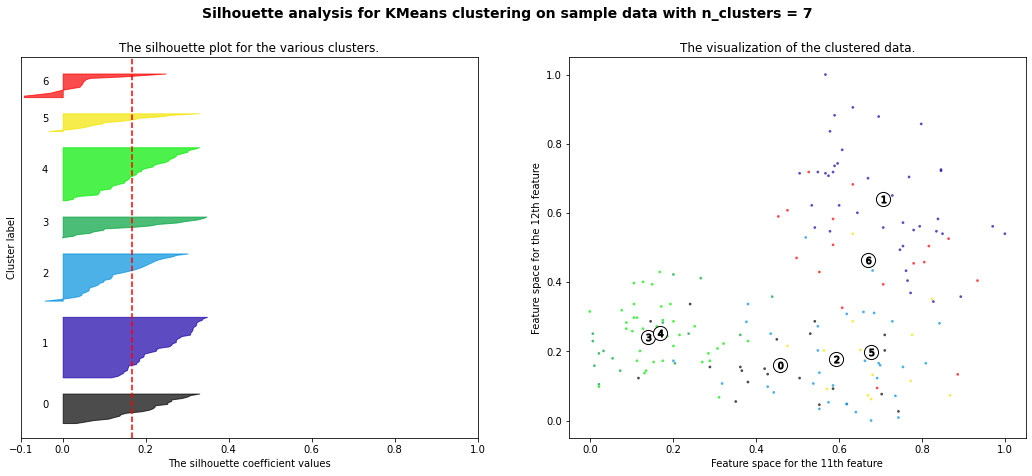

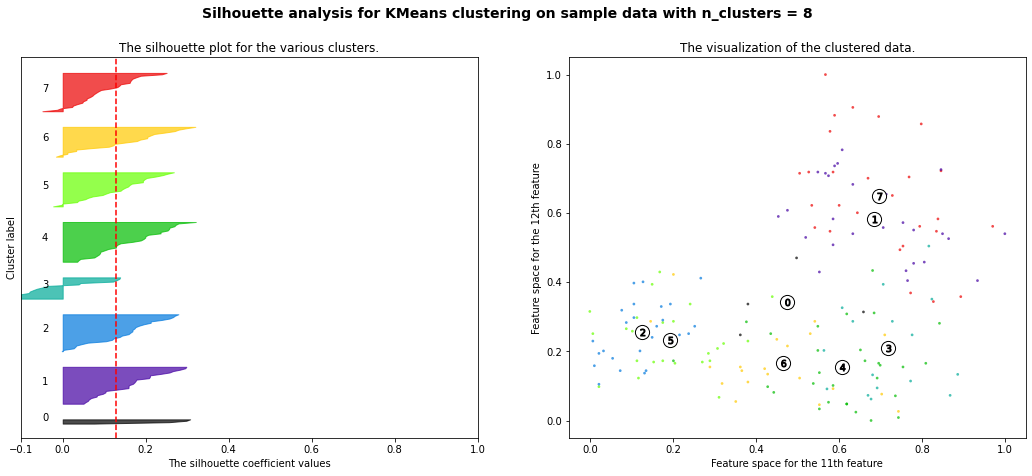

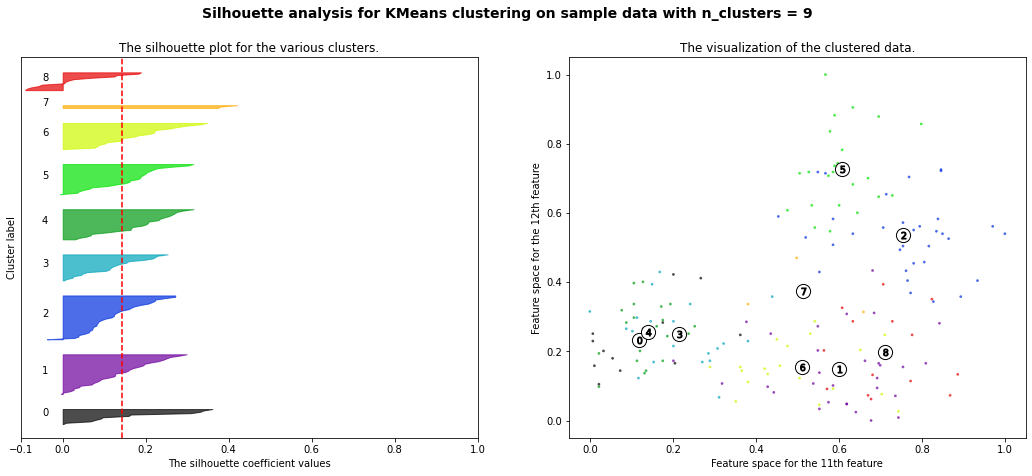

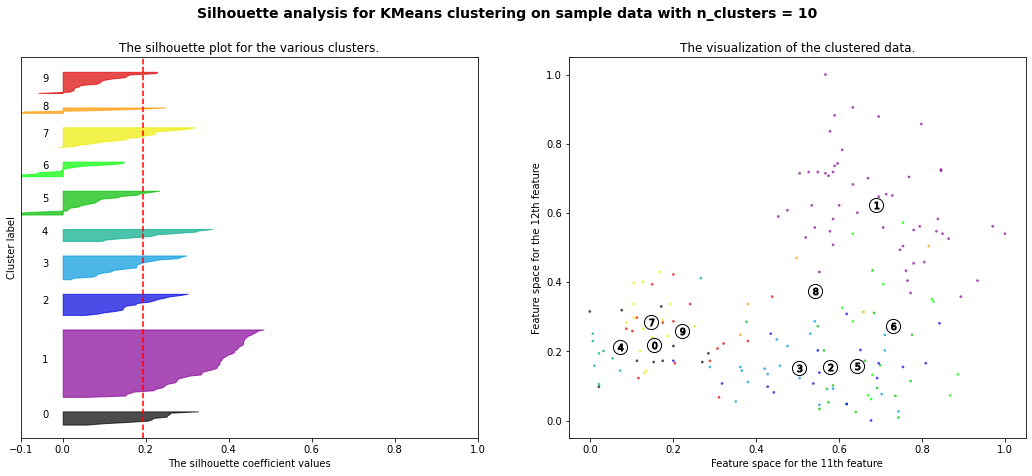

In [ ]:
sil_score = []
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sil_score.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 11], x[:, 12], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 11], centers[:, 12], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[11], c[12], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 11th feature")
    ax2.set_ylabel("Feature space for the 12th feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

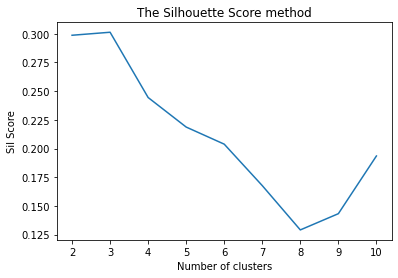

In [ ]:
plt.plot(range(2, 11), sil_score)
plt.title('The Silhouette Score method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil Score')
plt.show()

**Predicting labels using K-means**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 10000, n_init = 50, random_state = 1)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 2 2 2 2 2 2 0 2 0 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Visualising the clusters**

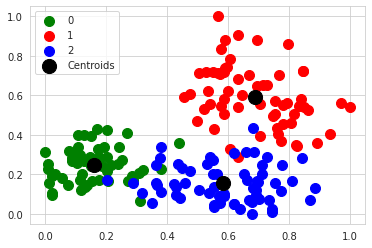

In [ ]:

plt.scatter(x[y_kmeans == 0, 11], x[y_kmeans == 0, 12], s = 100, c = 'green', label = '0')
plt.scatter(x[y_kmeans == 1, 11], x[y_kmeans == 1, 12], s = 100, c = 'red', label = '1')
plt.scatter(x[y_kmeans == 2, 11], x[y_kmeans == 2, 12], s = 100, c = 'blue', label = '2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 11], kmeans.cluster_centers_[:,12], s = 200, c = 'black', label = 'Centroids')

plt.legend()

In [ ]:
df_wine['predicted']=y_kmeans
df_wine.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  target  \
0         0.372014  0.455285                      0.970696  0.561341       0   
1         0.264505  0.463415                      0.780220  0.550642       0   
2         0.375427  0.447154                      0.695971  0.646933       0   
3         0.556314  0.308943                      0.798535  0.857347       0   
4         0.259386  0.455285                      0.608059  0.325963       0   

   predicted  
0          0  
1          0  
2          0  
3          0  
4          4

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


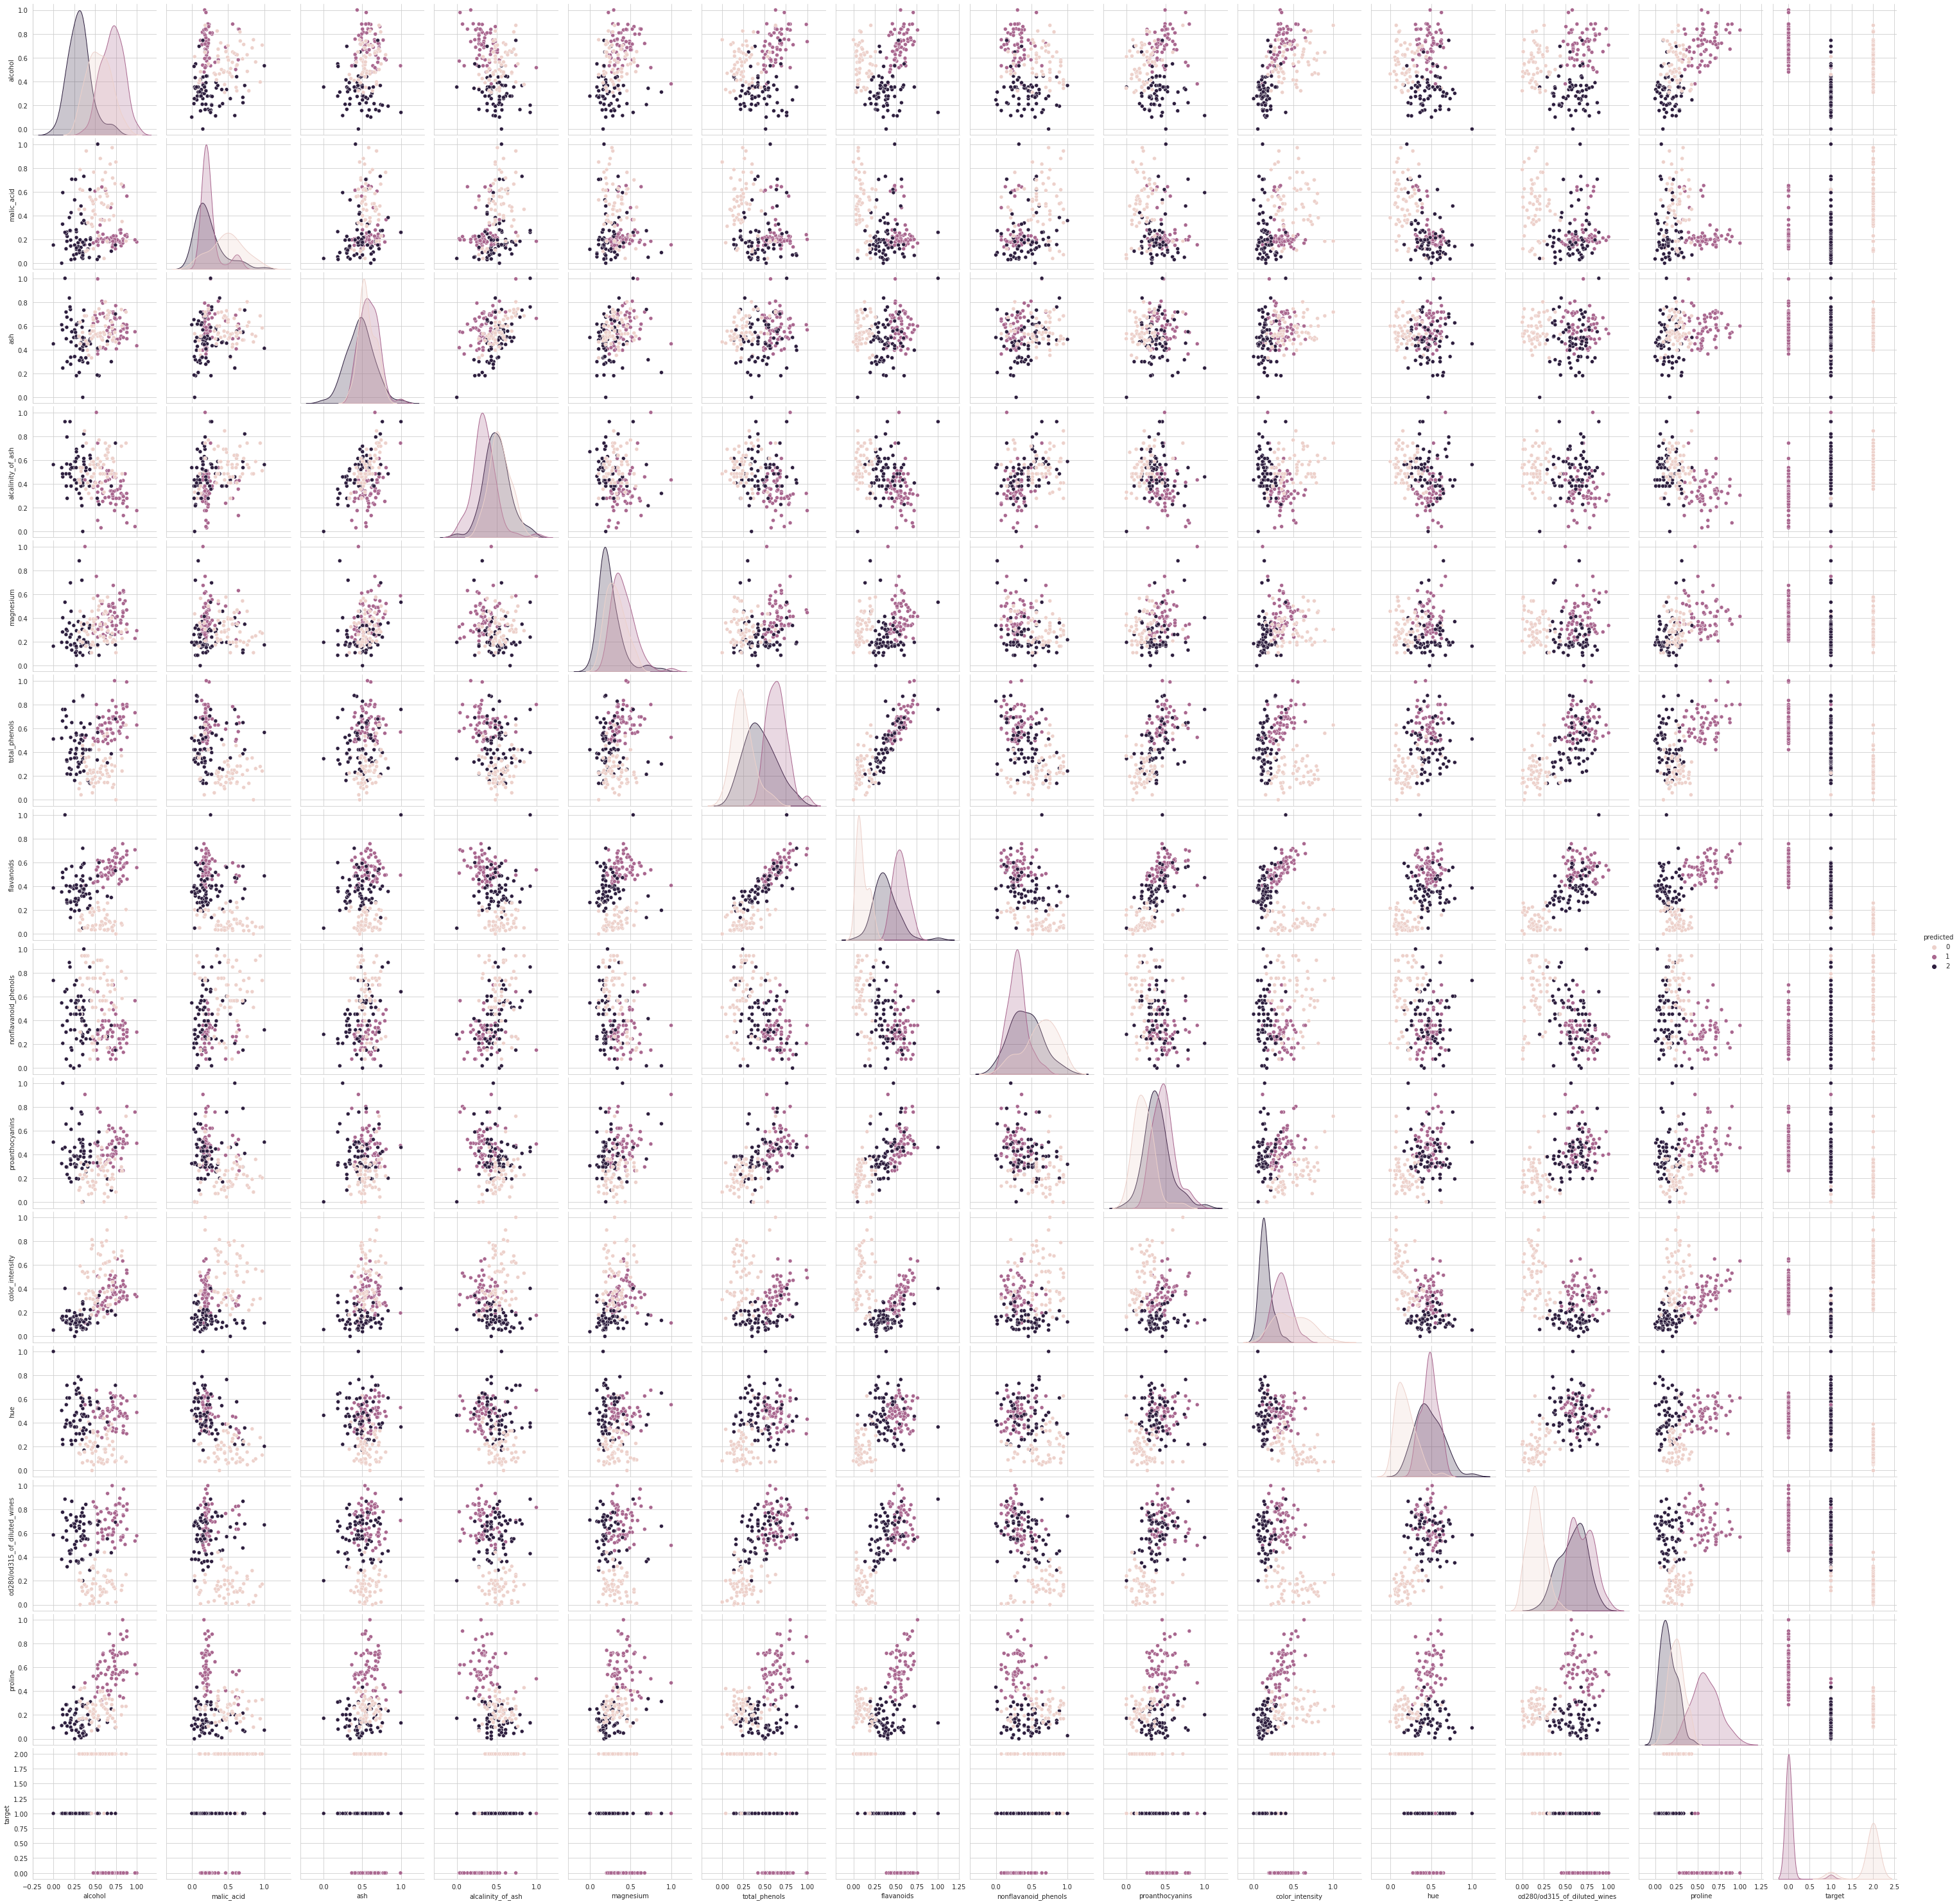

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df_wine,hue="predicted",size=3);
plt.show()

**Calculating Accuracy (Using Hungarian)**

In [ ]:
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 10000, n_init = 50, random_state = 1)
  y_kmeans = kmeans.fit_predict(x)
  df_wine['predicted']=y_kmeans
  print(accuracy(df_wine['target'], df_wine['predicted']))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


0.601123595505618
0.9550561797752809


/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


0.8258426966292135
0.7359550561797753


/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


0.6179775280898876


/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


0.6179775280898876


/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


0.42134831460674155


/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(


0.43258426966292135
0.43820224719101125


/usr/local/lib/python3.8/dist-packages/sklearn/utils/linear_assignment_.py:124: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  warnings.warn(
